# Dask-xgboost on binder

## Using xgboost

In [1]:
import xgboost
import matplotlib.pyplot as plt
from dask_ml.model_selection import train_test_split
from dask_ml.datasets import make_regression
from dask.distributed import Client, progress
client = Client(processes=True, threads_per_worker=4,
                n_workers=1, memory_limit='2GB')
client

Client Scheduler: tcp://127.0.0.1:35291 Dashboard: /user/dask-dask-examples-656cpnii/proxy/8787/status,Cluster Workers: 1 Cores: 4 Memory: 2.00 GB


In [2]:
X, y = make_regression(n_samples=125, n_features=4, chunks=50,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
X_train

dask.array<concatenate, shape=(112, 4), dtype=float64, chunksize=(45, 4), chunktype=numpy.ndarray>

In [3]:
dtrain = xgboost.dask.DaskDMatrix(client, X_train, y_train)
output = xgboost.dask.train(client,
                            {'verbosity': 2,
                             'tree_method': 'hist'},
                            dtrain,
                            num_boost_round=4, evals=[(dtrain, 'train')])

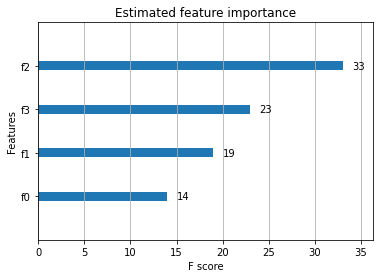

In [4]:
%matplotlib inline
ax = xgboost.plot_importance(output["booster"])
ax.grid(False, axis="y")
ax.set_title('Estimated feature importance')
plt.show()

## Using dask_xgboost

The error has been mentioned here  
https://github.com/dask/dask-xgboost/issues/64  
You need to have `Client(processes=True`

In [5]:
import dask_xgboost
params = {'objective': 'reg:squarederror',
          'max_depth': 6, 'eta': 0.01}

bst = dask_xgboost.train(client, params, X_train, y_train,num_boost_round=4)

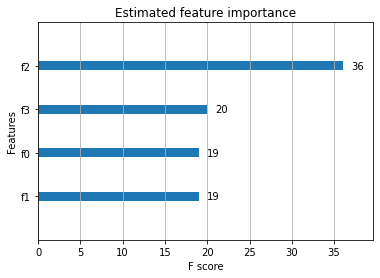

In [6]:
ax = xgboost.plot_importance(bst)
ax.grid(False, axis="y")
ax.set_title('Estimated feature importance')
plt.show()